<h1><center>Credit EDA Case Study</center></h1>
<center>By,</center>
<center>Gnanasambandan Padmanaban</center>
<center>Peter Sharun Woodman M</center>

## Prerequisite

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

In [3]:
# Configuration of DataFrame

# Setting max columns and max rows to be displayed
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_info_columns', 200)

# For not displaying in exponential format and to show decimal places
pd.options.display.float_format = "{:.6f}".format

## Step 1: Data Sourcing
<br>

-  ### Substep 1.1: Import and read

    Note: Please keep the files to read in the same directory as the current python file

In [4]:
# Importing and reading the application_data database.
application_df = pd.read_csv("./application_data.csv")
print("Dataframe after importing and reading from the application_data database :")
display(application_df)

Dataframe after importing and reading from the application_data database :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

-  ### Substep 1.2: Inspect the DataFrame

In [5]:
# Code for inspection

# Describing the DataFrame
print("Describing the Application DataFrame :")
display(application_df.describe())

print("\n---------------------------------------------------------------------------------------------------\n")

# Shape of DataFrame
print("Shape of Application DataFrame : {0}".format(application_df.shape))
print("\t -Number of rows in DataFrame: {0}".format(application_df.shape[0]))
print("\t -Number of columns in DataFrame: {0}".format(application_df.shape[1]))

print("\n---------------------------------------------------------------------------------------------------\n")

# Data types of columns in the DataFrame
print("Data types of columns in the Application dataframe :")
print(application_df.dtypes)

Describing the Application DataFrame :


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795


---------------------------------------------------------------------------------------------------

Shape of Application DataFrame : (307511, 122)
	 -Number of rows in DataFrame: 307511
	 -Number of columns in DataFrame: 122

---------------------------------------------------------------------------------------------------

Data types of columns in the Application dataframe :
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE 

In [6]:
# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(application_df.columns))

print("\n---------------------------------------------------------------------------------------------------\n")

# Information about DataFrame
print("Information about Application DataFrame :")
application_df.info()

Columns in DataFrame : 
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

---------------------------------------------------------------------------------------------------

Information about Application DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET         

In [7]:
# Viewing the first 5 records
print("Viewing the first 5 records :")
display(application_df.head(5))

print("\n---------------------------------------------------------------------------------------------------\n")

# Viewing the last 5 records
print("Viewing the last 5 records :")
display(application_df.tail(5))

Viewing the first 5 records :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675


---------------------------------------------------------------------------------------------------

Viewing the last 5 records :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.000000,254700.000000,27558.000000,225000.000000,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.000000,-1982,nan,1,1,0,1,0,0,Sales staff,1.000000,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,nan,0.202100,0.088700,0.987600,0.830000,0.020200,0.220000,0.103400,0.604200,0.270800,0.059400,0.148400,0.196500,0.075300,0.109500,0.100800,0.017200,0.978200,0.712500,0.017200,0.080600,0.034500,0.458300,0.041700,0.009400,0.088200,0.085300,0.000000,0.012500,0.204000,0.088700,0.987600,0.832300,0.020300,0.220000,0.103400,0.604200,0.270800,0.060500,0.150900,0.200100,0.075700,0.111800,reg oper account,block of flats,0.289800,"Stone, brick",No,0.000000,0.000000,0.000000,0.000000,-273.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
307507,456252,0,Cash loans,F,N,Y,0,72000.000000,269550.000000,12001.500000,225000.000000,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.000000,-4090,nan,1,0,0,1,1,0,NaN,1.000000,2,2,MONDAY,8,0,0,0,0,0,0,XNA,nan,0.115992,nan,0.024700,0.043500,0.972700,0.626000,0.002200,0.000000,0.103400,0.083300,0.125000,0.057900,0.020200,0.025700,0.000000,0.000000,0.025200,0.045100,0.972700,0.640600,0.002200,0.000000,0.103400,0.083300,0.125000,0.059200,0.022000,0.026700,0.000000,0.000000,0.025000,0.043500,0.972700,0.631000,0.002200,0.000000,0.103400,0.083300,0.125000,0.058900,0.020500,0.026100,0.000000,0.000000,reg oper account,block of flats,0.021400,"Stone, brick",No,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
307508,456253,0,Cash loans,F,N,Y,0,153000.000000,677664.000000,29979.000000,585000.000000,Unaccompanied,Working,Higher 

## Step 2: Data Cleaning
<br>

-  ### Substep 2.1: Inspect the null values

In [8]:
# Write your code for column-wise null count here
print("Column-wise null count and null percentage:")

# Calculating column-wise null count
app_col_null_count_series = application_df.isnull().sum()

# Calculating column-wise null percentage
app_col_null_perc_series = round(((app_col_null_count_series / application_df.shape[0]) * 100), 2)

# Combining column-wise null count and null percentages
app_combined_col_null_df = pd.concat([app_col_null_count_series, app_col_null_perc_series], axis=1)

# Changing column names
app_combined_col_null_df.columns = ['Null Count', 'Null Percentage']

# Printing the combined DataFrame
display(app_combined_col_null_df)

Column-wise null count and null percentage:


,Null Count,Null Percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000000


In [9]:
# Write your code for row-wise null count here
print("Row-wise null count and null percentage:")

# Calculating row-wise null count
app_row_null_count_series = application_df.isnull().sum(axis=1)

# Calculating row-wise null percentage
app_row_null_perc_series = round(((app_row_null_count_series / application_df.shape[1]) * 100), 2)

# Combining row-wise null count and null percentages
app_combined_row_null_df = pd.concat([app_row_null_count_series, app_row_null_perc_series], axis=1)

# Changing column names for combined DataFrame
app_combined_row_null_df.columns = ['Null Count', 'Null Percentage']

# Printing the combined DataFrame
display(app_combined_row_null_df)

Row-wise null count and null percentage:


,Null Count,Null Percentage
0,1,0.820000
1,2,1.640000
2,48,39.340000
3,56,45.900000
4,50,40.980000
...,...,...
307506,8,6.560000
307507,10,8.200000
307508,4,3.280000
307509,30,24.590000


-  ### Substep 2.2: Drop unecessary columns <br>
    -  ### Substep 2.2.1: Dropping columns whose null percentages is very high

In [10]:
# Calculating whether null % is greater than 45%
app_combined_col_null_df['Is Greater than 45%'] = app_combined_col_null_df['Null Percentage'] > 45

# Printing the combined DataFrame
print("Null percentage of columns:")
display(app_combined_col_null_df)

# Calculating the columns for which null % is greater than 45%
app_greater_null_percen_cols_index = app_combined_col_null_df[app_combined_col_null_df['Is Greater than 45%']].index

print("\n---------------------------------------------------------------------------------------------------\n")

# Printing columns for which null % is greater than 45%
print("Columns for which null percentage is greater than 45% :\n")
print("- Number of columns: {0}".format(len(list(app_greater_null_percen_cols_index))))
print("- List of columns: {0}".format(list(app_greater_null_percen_cols_index)))

print("\n---------------------------------------------------------------------------------------------------\n")

# Removing columns for which null percentage is greater than 45%
print("Dropping columns for which null percentage is greater than 45%...")
application_df.drop(columns=app_greater_null_percen_cols_index, axis=1, inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating column-wise null percentage after dropping
app_col_null_count_series_coldrop = application_df.isnull().sum()
app_col_null_perc_series_coldrop = round(((app_col_null_count_series_coldrop / application_df.shape[0]) * 100), 2)
display(app_col_null_perc_series_coldrop)

Null percentage of columns:


,Null Count,Null Percentage,Is Greater than 45%
SK_ID_CURR,0,0.000000,False
TARGET,0,0.000000,False
NAME_CONTRACT_TYPE,0,0.000000,False
CODE_GENDER,0,0.000000,False
FLAG_OWN_CAR,0,0.000000,False
FLAG_OWN_REALTY,0,0.000000,False
CNT_CHILDREN,0,0.000000,False
AMT_INCOME_TOTAL,0,0.000000,False
AMT_CREDIT,0,0.000000,False
AMT_ANNUITY,12,0.000000,False



---------------------------------------------------------------------------------------------------

Columns for which null percentage is greater than 45% :

- Number of columns: 49
- List of columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.090000
NAME_TYPE_SUITE                0.420000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


   -  ### Substep 2.2.2: Dropping less significant columns
        Many of the columns are of less significance so it is better to drop those unecessary columns, they are:
        <br>
    
        - NAME_TYPE_SUITE
        - DAYS_REGISTRATION
        - FLAG_MOBIL
        - FLAG_EMP_PHONE
        - FLAG_WORK_PHONE
        - FLAG_CONT_MOBILE
        - FLAG_PHONE
        - FLAG_EMAIL
        - HOUR_APPR_PROCESS_START
        - EXT_SOURCE_2
        - EXT_SOURCE_3
        - FLAG_DOCUMENT_2
        - FLAG_DOCUMENT_3
        - FLAG_DOCUMENT_4
        - FLAG_DOCUMENT_5
        - FLAG_DOCUMENT_6
        - FLAG_DOCUMENT_7
        - FLAG_DOCUMENT_8
        - FLAG_DOCUMENT_9
        - FLAG_DOCUMENT_10
        - FLAG_DOCUMENT_11
        - FLAG_DOCUMENT_12
        - FLAG_DOCUMENT_13
        - FLAG_DOCUMENT_14
        - FLAG_DOCUMENT_15
        - FLAG_DOCUMENT_16
        - FLAG_DOCUMENT_17
        - FLAG_DOCUMENT_18
        - FLAG_DOCUMENT_19
        - FLAG_DOCUMENT_20
        - FLAG_DOCUMENT_21
        - AMT_REQ_CREDIT_BUREAU_HOUR
        - AMT_REQ_CREDIT_BUREAU_DAY
        - AMT_REQ_CREDIT_BUREAU_WEEK
        - AMT_REQ_CREDIT_BUREAU_MON
        - AMT_REQ_CREDIT_BUREAU_QRT
        - AMT_REQ_CREDIT_BUREAU_YEAR
        - OBS_30_CNT_SOCIAL_CIRCLE
        - DEF_30_CNT_SOCIAL_CIRCLE
        - OBS_60_CNT_SOCIAL_CIRCLE
        - DEF_60_CNT_SOCIAL_CIRCLE

In [11]:
#  Printing number of columns before dropping
print("Number of columns before dropping : {0} \n".format(application_df.shape[1]))

#Preparing and printing the list of columns to be dropped
cols_to_be_dropped = ['NAME_TYPE_SUITE',
'DAYS_REGISTRATION',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'HOUR_APPR_PROCESS_START',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE'
]
print("Number of columns to be dropped : {0} \n \nList of columns to be dropped : {1}\n".format(len(cols_to_be_dropped), cols_to_be_dropped))

# Dropping columnns and assigning it to new DataFrame "application_df_after_coldrop"
print("Dropping columns...\n")
application_df_after_coldrop = application_df.drop(columns=cols_to_be_dropped, axis=1)

# Printing number of columns after dropping
print("Number of columns after dropping : {0}\n".format(application_df_after_coldrop.shape[1]))

# Printing the columns of resultant DataFrame
print("Resultant columns of dataframe : {0}".format(list(application_df_after_coldrop.columns)))

# Printing the head of resultant DataFrame
print("\n---------------------------------------------------------------------------------------------------\n")

print("Resultant dataframe (first 5 rows) :")

display(application_df_after_coldrop.head(5))

Number of columns before dropping : 73 

Number of columns to be dropped : 41 
 
List of columns to be dropped : ['NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

Droppi

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,-1134.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.000000,1,1,MONDAY,0,0,0,0,0,0,School,-828.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.000000,2,2,MONDAY,0,0,0,0,0,0,Government,-815.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,-617.000000
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.000000,2,2,THURSDAY,0,0,0,0,1,1,Religion,-1106.000000


-  ### Substep 2.3: Analysing null count and null percentage after dropping

In [12]:
# Calculating column-wise null count
app_null_count_cols = application_df_after_coldrop.isnull().sum()

# Calculating column-wise null percentage
app_null_percen_cols = round((((application_df_after_coldrop.isnull().sum() / application_df_after_coldrop.shape[0]) * 100)),2)

# Combining column-wise null count and null percentages
app_combined_col_null_df = pd.concat([app_null_count_cols, app_null_percen_cols], axis=1)

# Changing column names
app_combined_col_null_df.columns = ['Null Count', 'Null Percentage']

# Printing the combined DataFrame
print("->Null percentages of columns :")
display(app_combined_col_null_df)

# Assignment to new variable
application_df_after_rowcoldrop = application_df_after_coldrop

print('Observation:')
print('-We can see that OCCUPATION_TYPE has around 31.35% of missing values.')
print('-There are also few columns with very less null values like:\n\t AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE')
print('-These null values will be handled in the upcoming steps')

->Null percentages of columns :


,Null Count,Null Percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000000


Observation:
-We can see that OCCUPATION_TYPE has around 31.35% of missing values.
-There are also few columns with very less null values like:
	 AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE
-These null values will be handled in the upcoming steps


-  ### Substep 2.4: Handling NaN values

#### Handling NAN values for AMT_GOODS_PRICE

In [13]:
print('Analysing NULL values for AMT_GOODS_PRICE:\n')

#Calculating null value of AMT_GOODS_PRICE
app_null_percen_cols_befDrop = application_df_after_rowcoldrop['AMT_GOODS_PRICE'].isnull().sum()
print("->Null count of columns: {0}".format(app_null_percen_cols_befDrop))

# Best Metric To Impute Values for 'AMT_GOODS_PRICE'
print("\nDescribing the column:")
display(application_df_after_rowcoldrop['AMT_GOODS_PRICE'].describe())
print("Checking the quantiles from 85th to 95th percentage:\n")
print(application_df_after_rowcoldrop['AMT_GOODS_PRICE'].quantile([0.85,0.90,0.95]))
print('\nUpon analysing the larger quantiles we can see that there are outliers in AMT_GOODS_PRICE.')
print('In this case. It is better to impute the median.')

print("\n---------------------------------------------------------------------------------------------------\n")

print("Imputing the median...")
application_df_after_rowcoldrop['AMT_GOODS_PRICE'].fillna(application_df['AMT_GOODS_PRICE'].median(), inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating null percentages of columns after imputing values for the columns
app_null_percen_cols_aftDrop = application_df_after_rowcoldrop['AMT_GOODS_PRICE'].isnull().sum()
print("->Null count of columns after imputing : {0}".format(app_null_percen_cols_aftDrop))

Analysing NULL values for AMT_GOODS_PRICE:

->Null count of columns: 278

Describing the column:


count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

Checking the quantiles from 85th to 95th percentage:

0.850000    900000.000000
0.900000   1093500.000000
0.950000   1305000.000000
Name: AMT_GOODS_PRICE, dtype: float64

Upon analysing the larger quantiles we can see that there are outliers in AMT_GOODS_PRICE.
In this case. It is better to impute the median.

---------------------------------------------------------------------------------------------------

Imputing the median...

---------------------------------------------------------------------------------------------------

->Null count of columns after imputing : 0


#### Handling NAN values for AMT_ANNUITY

In [14]:
print('Analysing NULL values for AMT_ANNUITY:\n')

#Calculating null value of AMT_GOODS_PRICE
app_null_percen_cols_befDrop = application_df_after_rowcoldrop['AMT_ANNUITY'].isnull().sum()
print("->Null count of column : {0}\n".format(app_null_percen_cols_befDrop))

# Imputing values for null in 'AMT_ANNUITY' column
print("Describing the column:")
display(application_df_after_rowcoldrop.AMT_ANNUITY.describe())
print("Checking the quantiles from 85th to 95th percentage:\n")
print(application_df_after_rowcoldrop['AMT_ANNUITY'].quantile([0.85,0.90,0.95]))

print('\nUpon analysing the larger quantiles we can see that there are outliers in AMT_ANNUITY.')
print('In this case. It is better to impute the median.')

print("\n---------------------------------------------------------------------------------------------------\n")

print("Imputing missing values...")
application_df_after_rowcoldrop['AMT_ANNUITY'].fillna(application_df.AMT_ANNUITY.median(), inplace=True)

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating null count of columns after imputing values for the columns
app_null_percen_cols_aftDrop = application_df_after_rowcoldrop['AMT_ANNUITY'].isnull().sum()
print("->Null count of columns after imputing : {0}".format(app_null_percen_cols_aftDrop))

Analysing NULL values for AMT_ANNUITY:

->Null count of column : 12

Describing the column:


count   307499.000000
mean     27108.573909
std      14493.737315
min       1615.500000
25%      16524.000000
50%      24903.000000
75%      34596.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

Checking the quantiles from 85th to 95th percentage:

0.850000   40806.000000
0.900000   45954.000000
0.950000   53325.000000
Name: AMT_ANNUITY, dtype: float64

Upon analysing the larger quantiles we can see that there are outliers in AMT_ANNUITY.
In this case. It is better to impute the median.

---------------------------------------------------------------------------------------------------

Imputing missing values...

---------------------------------------------------------------------------------------------------

->Null count of columns after imputing : 0


#### Handling NAN values for DAYS_LAST_PHONE_CHANGE

In [15]:
print('Analysing NULL values for DAYS_LAST_PHONE_CHANGE:\n')

print("There is 1 NA value left in 'DAYS_LAST_PHONE_CHANGE' column\n")

print("Describing the column:")
display(application_df_after_rowcoldrop['DAYS_LAST_PHONE_CHANGE'].describe())

print("We can see that there is outliers, so it is better to impute the missing value with the median.")

val_to_impute = application_df_after_rowcoldrop['DAYS_LAST_PHONE_CHANGE'].median()

application_df_after_rowcoldrop['DAYS_LAST_PHONE_CHANGE'].fillna(value=val_to_impute, axis = 0, inplace=True)

print("\nDescribing the column before imputing the values:")
display(application_df_after_rowcoldrop['DAYS_LAST_PHONE_CHANGE'].describe())


Analysing NULL values for DAYS_LAST_PHONE_CHANGE:

There is 1 NA value left in 'DAYS_LAST_PHONE_CHANGE' column

Describing the column:


count   307510.000000
mean      -962.858788
std        826.808487
min      -4292.000000
25%      -1570.000000
50%       -757.000000
75%       -274.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

We can see that there is outliers, so it is better to impute the missing value with the median.

Describing the column before imputing the values:


count   307511.000000
mean      -962.858119
std        826.807226
min      -4292.000000
25%      -1570.000000
50%       -757.000000
75%       -274.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### The columns 'CODE_GENDER' and 'ORGANIZATION_TYPE' have values 'XNA' which means 'Not Applicable'. Analyzing those columns:

In [16]:
#For CODE_GENDER
print("Frequency of values in 'CODE_GENDER' column:")
print(application_df_after_rowcoldrop['CODE_GENDER'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

print("There are only two rows with value XNA which is very negligible. So, we can delete those rows.")
print("Deleting the rows which has value as XNA in the 'CODE_GENDER' column")
application_df_after_rowcoldrop.drop(application_df_after_rowcoldrop.loc[application_df_after_rowcoldrop['CODE_GENDER']=='XNA'].index,axis=0,inplace =True)

print("\n---------------------------------------------------------------------------------------------------\n")

print("\nFrequency of values in 'CODE_GENDER' column after deleting:")
print(application_df_after_rowcoldrop['CODE_GENDER'].value_counts())

Frequency of values in 'CODE_GENDER' column:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

---------------------------------------------------------------------------------------------------

There are only two rows with value XNA which is very negligible. So, we can delete those rows.
Deleting the rows which has value as XNA in the 'CODE_GENDER' column

---------------------------------------------------------------------------------------------------


Frequency of values in 'CODE_GENDER' column after deleting:
F    202448
M    105059
Name: CODE_GENDER, dtype: int64


In [17]:
#For ORGANIZATION_TYPE
print("Frequency of values in 'ORGANIZATION_TYPE' column:")
print(application_df_after_rowcoldrop['ORGANIZATION_TYPE'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

print("There are many rows with value XNA which will affect our analysis. So, we can delete those rows.")
print("Deleting the rows which has value as XNA in the 'ORGANIZATION_TYPE' column")
application_df_after_rowcoldrop.drop(application_df_after_rowcoldrop.loc[application_df_after_rowcoldrop['ORGANIZATION_TYPE']=='XNA'].index,axis=0,inplace =True)

print("\n---------------------------------------------------------------------------------------------------\n")

print("\nFrequency of values in 'ORGANIZATION_TYPE' column after deleting:")
print(application_df_after_rowcoldrop['ORGANIZATION_TYPE'].value_counts())

Frequency of values in 'ORGANIZATION_TYPE' column:
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University           

In [18]:
print("Analysing null values for OCCUPATION_TYPE\n")

# Calculating null percentages of columns
app_null_percen_cols_befDrop = application_df_after_rowcoldrop['OCCUPATION_TYPE'].isnull().sum()
print("->Null count of column : {0}\n".format(app_null_percen_cols_befDrop))

print("Frequency of values in 'OCCUPATION_TYPE' column:")
print(application_df_after_rowcoldrop['OCCUPATION_TYPE'].value_counts())

# Imputing values for null in 'OCCUPATION_TYPE' column
print("\nWe cannot impute a wrong value to the column.")
print("Deleting the rows which has null value for the column 'OCCUPATION_TYPE' will affect our analysis")
print("There may be multiple reasons for missing values, it may be due to:")
print("\t not willing to disclose, improper data collection etc.")
print("We are going to impute the missing values with the value 'Unkown' for the column 'OCCUPATION_TYPE'")
print("\n---------------------------------------------------------------------------------------------------\n")

application_df_after_rowcoldrop['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
print("Frequency of values in 'OCCUPATION_TYPE' column:")
print(application_df_after_rowcoldrop['OCCUPATION_TYPE'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating null percentages of columns after imputing values for the columns
app_null_percen_cols_aftDrop = application_df_after_rowcoldrop['OCCUPATION_TYPE'].isnull().sum()
print("->Null percentages of columns after imputing rows : {0}".format(app_null_percen_cols_aftDrop))

Analysing null values for OCCUPATION_TYPE

->Null count of column : 41017

Frequency of values in 'OCCUPATION_TYPE' column:
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4651
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

We cannot impute a wrong value to the column.
Deleting the rows which has null value for the column 'OCCUPATION_TYPE' will affect our analysis
There may be multiple reasons for missing values, it may be due to:
	 not willing to disclose, improper data collection etc.
We are going 

In [19]:
#For CNT_FAM_MEMBERS
print("Count of null values in 'CNT_FAM_MEMBERS' column:")
print(application_df_after_rowcoldrop['CNT_FAM_MEMBERS'].isnull().sum())

print("\n---------------------------------------------------------------------------------------------------\n")

print("There are only two rows with null value which is very negligible. So, we can delete those rows.")
print("Deleting the rows which has null value in the 'CNT_FAM_MEMBERS' column")
application_df_after_rowcoldrop.dropna(subset = ['CNT_FAM_MEMBERS'], inplace =True)

print("\n---------------------------------------------------------------------------------------------------\n")

print("Count of null values in 'CNT_FAM_MEMBERS' column after deleting:")
print(application_df_after_rowcoldrop['CNT_FAM_MEMBERS'].isnull().sum())

Count of null values in 'CNT_FAM_MEMBERS' column:
2

---------------------------------------------------------------------------------------------------

There are only two rows with null value which is very negligible. So, we can delete those rows.
Deleting the rows which has null value in the 'CNT_FAM_MEMBERS' column

---------------------------------------------------------------------------------------------------

Count of null values in 'CNT_FAM_MEMBERS' column after deleting:
0


-  ### Substep 2.5: Drop duplicate values (if any)

In [20]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(application_df_after_rowcoldrop.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
application_df_after_rowcoldrop.drop_duplicates(keep = 'first')

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(application_df_after_rowcoldrop.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 252131

Dropping duplicates... 

Number of rows after dropping : 252131

We can observe that there are no duplicate values.


-  ### Substep 2.6: Check the number of retained rows

In [21]:
# Calculating null percentage of columns
print("Null percentage of columns : \n{0}".format(round(((application_df_after_rowcoldrop.isnull().sum() / application_df_after_rowcoldrop.shape[0]) * 100), 2)))

print("\n---------------------------------------------------------------------------------------------------\n")

# Calculating number and percentage of rows retained
print("Number and percentage of rows retained after completing all the tasks above :")
print("Number of rows before dropping : {0}".format(application_df.shape[0]))
print("Number of rows retained after dropping : {0}".format(application_df_after_rowcoldrop.shape[0]))
retained_row_perc = (application_df_after_rowcoldrop.shape[0] / application_df.shape[0]) * 100
print("Percentage of retained rows : {0}".format(round(retained_row_perc, 2)))

Null percentage of columns : 
SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_ID_PUBLISH               0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000000
REGION_RATING_CLIENT          0.000000
REGION_RATING_CLIENT_W_CITY   0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
REG_REGION_NOT_LIVE_REGION    0.00

In [22]:
# Reindexing the DataFrame so that the index is in correct sequence
application_df_after_rowcoldrop.reset_index(drop=True,inplace=True)

-  ### Substep 2.7: Data Conversion and Calculated Variables
      - #### Subtask 2.7.1: Converting the negative days to positive

In [23]:
# Data conversion
print("Displaying the columns with negative values:")
display(application_df_after_rowcoldrop[['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head())

print("\nNegative days are not possible so converting it to positive value.")
application_df_after_rowcoldrop[['DAYS_BIRTH', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = abs(application_df_after_rowcoldrop[['DAYS_BIRTH', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].astype(int))

# After conversion
print("\nDisplaying the columns after conversion:")
display(application_df_after_rowcoldrop[['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head())


Displaying the columns with negative values:


,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,100002,-9461,-637,-2120,-1134.000000
1,100003,-16765,-1188,-291,-828.000000
2,100004,-19046,-225,-2531,-815.000000
3,100006,-19005,-3039,-2437,-617.000000
4,100007,-19932,-3038,-3458,-1106.000000



Negative days are not possible so converting it to positive value.

Displaying the columns after conversion:


,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,100002,9461,637,2120,1134
1,100003,16765,1188,291,828
2,100004,19046,225,2531,815
3,100006,19005,3039,2437,617
4,100007,19932,3038,3458,1106


   - ### Subtast 2.7.2: Typecasting or Data type conversion

In [24]:
#Typecasting the data type's of the variable

print("Info before typecasting the data type:\n")
display(application_df_after_rowcoldrop.info())

print("\n---------------------------------------------------------------------------------------------------\n")

# Specifying columns to convert
dtype_columns_to_convert = {
    #Categorical Conversion
    'NAME_CONTRACT_TYPE': 'category', 'CODE_GENDER': 'category', 'FLAG_OWN_CAR': 'category',
    'FLAG_OWN_REALTY': 'category', 'NAME_EDUCATION_TYPE': 'category', 'NAME_FAMILY_STATUS': 'category', 
    'NAME_HOUSING_TYPE': 'category', 'OCCUPATION_TYPE': 'category', 
    'NAME_INCOME_TYPE': 'category', 'REGION_RATING_CLIENT': 'category', 'REGION_RATING_CLIENT_W_CITY': 'category', 
     'WEEKDAY_APPR_PROCESS_START': 'category', 'WEEKDAY_APPR_PROCESS_START': 'category', 
     'REG_REGION_NOT_LIVE_REGION': 'category', 'REG_REGION_NOT_WORK_REGION': 'category', 
    'LIVE_REGION_NOT_WORK_REGION': 'category', 'REG_CITY_NOT_LIVE_CITY': 'category', 
    'REG_CITY_NOT_WORK_CITY': 'category', 'LIVE_CITY_NOT_WORK_CITY': 'category', 
    'LIVE_REGION_NOT_WORK_REGION': 'category', 'ORGANIZATION_TYPE': 'category',
    #Integer conversion
    'DAYS_LAST_PHONE_CHANGE': 'Int64',
    'DAYS_BIRTH': 'int64', 
    'DAYS_EMPLOYED': 'int64', 
    'DAYS_ID_PUBLISH': 'int64', 
    'DAYS_LAST_PHONE_CHANGE': 'int64',
    'TARGET': 'int64'
    
}

# Converting datatype of columns
print("Converting datatype of columns...")
application_df_after_rowcoldrop = application_df_after_rowcoldrop.astype(dtype_columns_to_convert)

print("\n---------------------------------------------------------------------------------------------------\n")

print("Info after typecasting the data type:\n")
application_df_after_rowcoldrop.info()

Info before typecasting the data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252131 entries, 0 to 252130
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252131 non-null  int64  
 1   TARGET                       252131 non-null  int64  
 2   NAME_CONTRACT_TYPE           252131 non-null  object 
 3   CODE_GENDER                  252131 non-null  object 
 4   FLAG_OWN_CAR                 252131 non-null  object 
 5   FLAG_OWN_REALTY              252131 non-null  object 
 6   CNT_CHILDREN                 252131 non-null  int64  
 7   AMT_INCOME_TOTAL             252131 non-null  float64
 8   AMT_CREDIT                   252131 non-null  float64
 9   AMT_ANNUITY                  252131 non-null  float64
 10  AMT_GOODS_PRICE              252131 non-null  float64
 11  NAME_INCOME_TYPE             252131 non-null  object 
 12  NAME_EDUCATION_TYP

None


---------------------------------------------------------------------------------------------------

Converting datatype of columns...

---------------------------------------------------------------------------------------------------

Info after typecasting the data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252131 entries, 0 to 252130
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252131 non-null  int64   
 1   TARGET                       252131 non-null  int64   
 2   NAME_CONTRACT_TYPE           252131 non-null  category
 3   CODE_GENDER                  252131 non-null  category
 4   FLAG_OWN_CAR                 252131 non-null  category
 5   FLAG_OWN_REALTY              252131 non-null  category
 6   CNT_CHILDREN                 252131 non-null  int64   
 7   AMT_INCOME_TOTAL             252131 non-null  float64 
 8   AMT_CRE

- ### Subtask 2.7.3: Calculated Values

In [25]:
print('Columns to convert as Years for better analysis')
display(application_df_after_rowcoldrop[['DAYS_EMPLOYED', 'DAYS_BIRTH']].head(5))

# DAYS_EMPLOYED to YEARS_EMPLOYED
application_df_after_rowcoldrop['YEARS_EMPLOYED'] = application_df_after_rowcoldrop['DAYS_EMPLOYED'] / 365
# DAYS_BIRTH to YEARS_BIRTH
application_df_after_rowcoldrop['YEARS_BIRTH'] = application_df_after_rowcoldrop['DAYS_BIRTH'] / 365

print('DataFrame after convertion to YEARS :')
application_df_after_rowcoldrop[['DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'DAYS_BIRTH', 'YEARS_BIRTH']].head(5)


Columns to convert as Years for better analysis


,DAYS_EMPLOYED,DAYS_BIRTH
0,637,9461
1,1188,16765
2,225,19046
3,3039,19005
4,3038,19932


DataFrame after convertion to YEARS :


,DAYS_EMPLOYED,YEARS_EMPLOYED,DAYS_BIRTH,YEARS_BIRTH
0,637,1.745205,9461,25.920548
1,1188,3.254795,16765,45.931507
2,225,0.616438,19046,52.180822
3,3039,8.326027,19005,52.068493
4,3038,8.323288,19932,54.608219


   - ### Subtask 2.7.4: Outlier detection

In [26]:
# Specifying the columns for outlier detection
cols_for_outlier_detec = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                         'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

print("Describing the columns for outlier detection:")
display(application_df_after_rowcoldrop[cols_for_outlier_detec].describe().transpose())

Describing the columns for outlier detection:


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,252131.000000,0.498515,0.763161,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,252131.000000,175912.706363,258854.024680,25650.000000,112500.000000,157500.000000,211500.000000,117000000.000000
AMT_CREDIT,252131.000000,611401.673731,406530.956996,45000.000000,277969.500000,521280.000000,829332.000000,4050000.000000
AMT_ANNUITY,252131.000000,27812.281885,14647.547730,1980.000000,17073.000000,25834.500000,35617.500000,258025.500000
AMT_GOODS_PRICE,252131.000000,549307.548891,373094.748428,40500.000000,247500.000000,450000.000000,693000.000000,4050000.000000
DAYS_BIRTH,252131.000000,14769.169384,3662.572140,7489.000000,11775.000000,14573.000000,17563.000000,25200.000000
DAYS_EMPLOYED,252131.000000,2384.155641,2338.331744,0.000000,767.000000,1648.000000,3175.000000,17912.000000
CNT_FAM_MEMBERS,252131.000000,2.252516,0.942116,1.000000,2.000000,2.000000,3.000000,20.000000


Outlier Analysis:


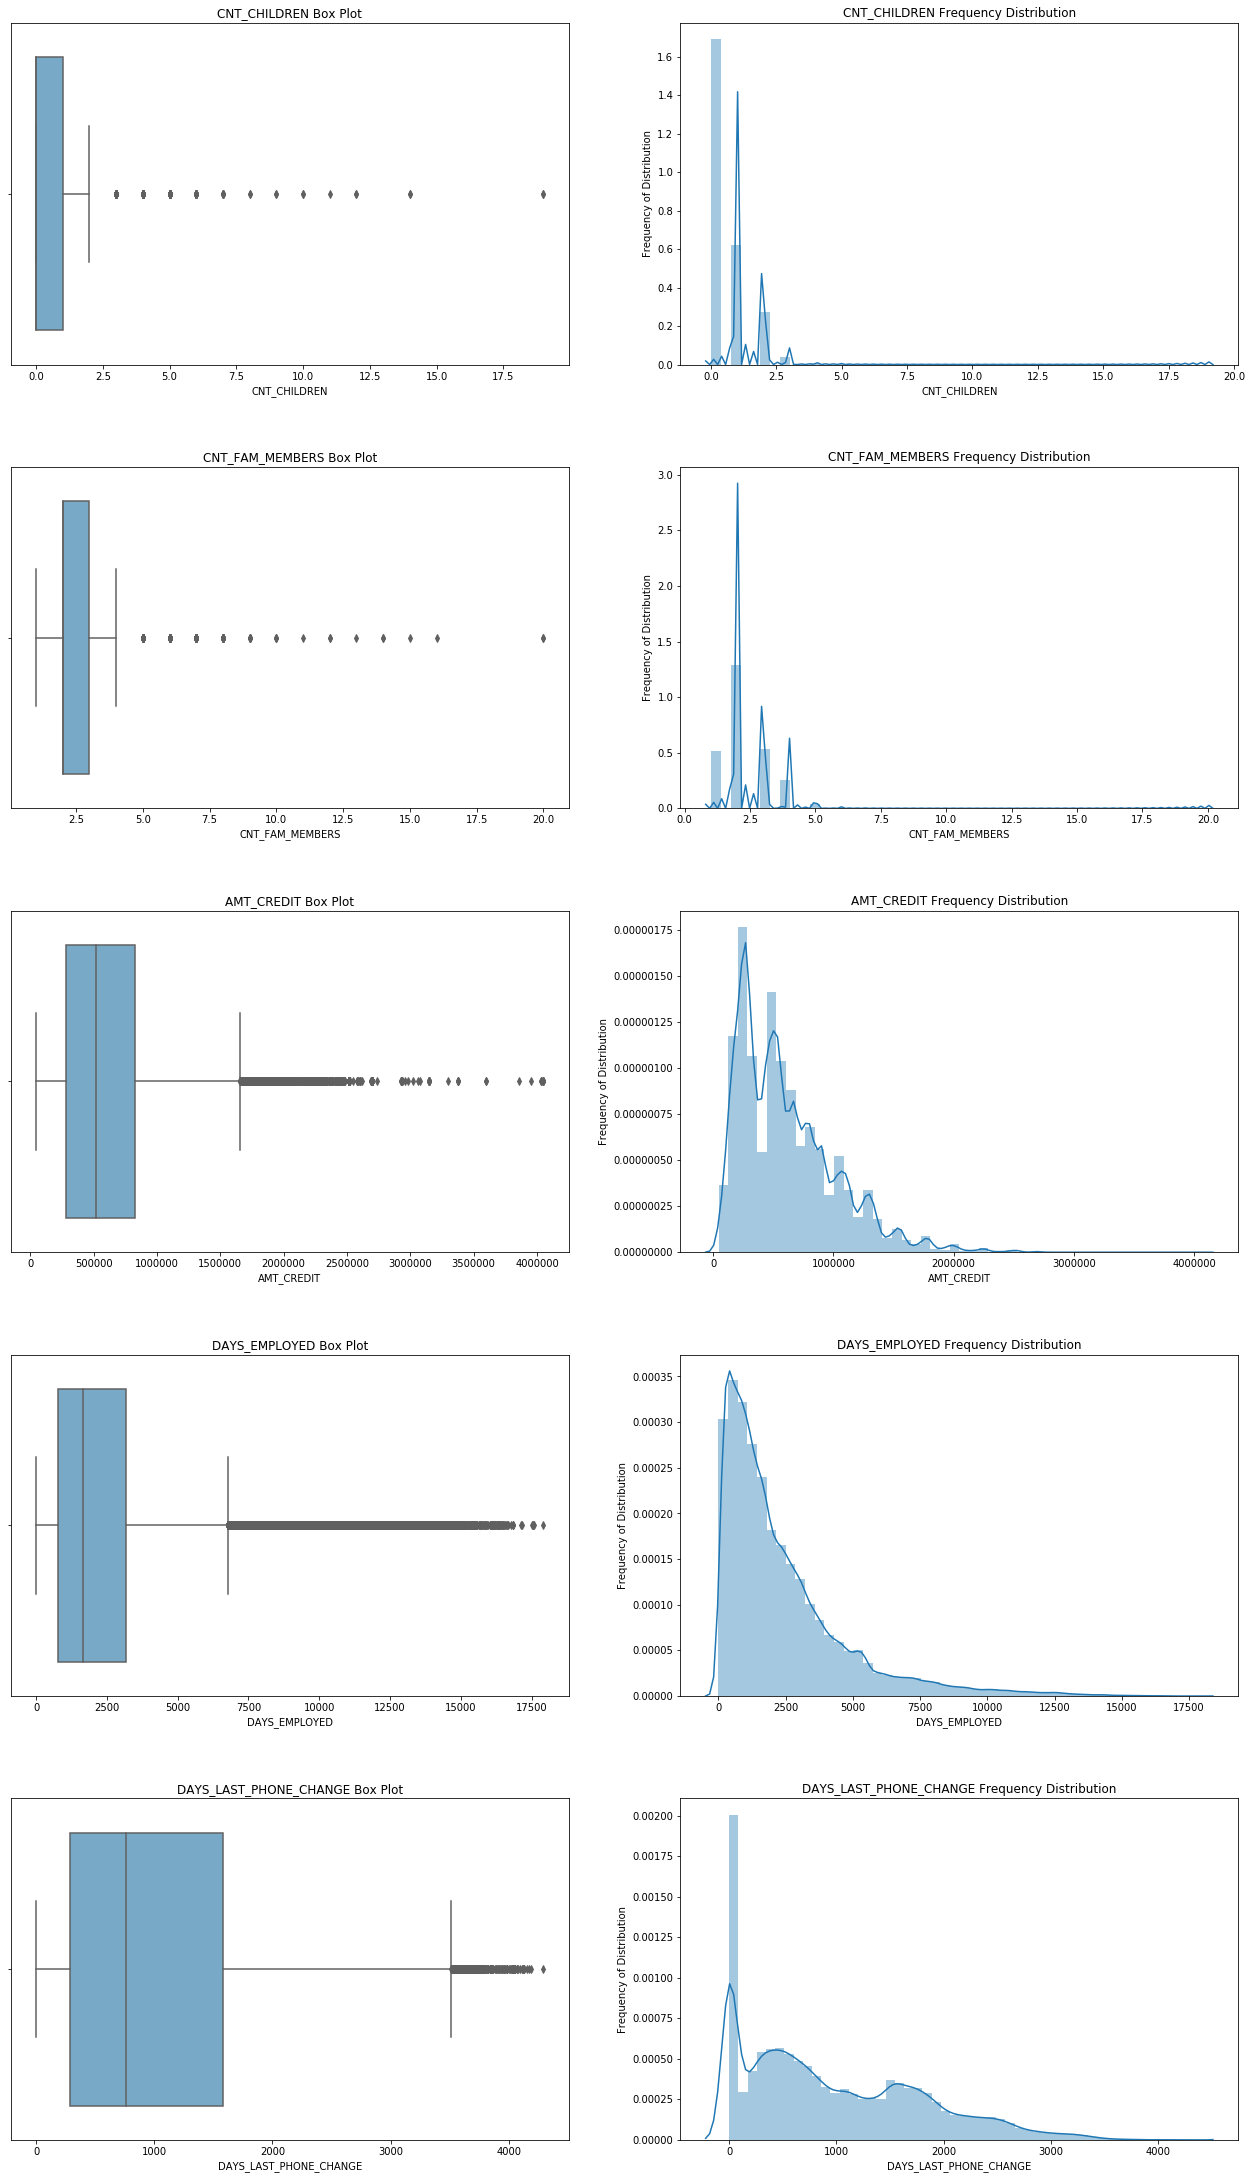

In [27]:
cols_for_outlier = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']
# 'AMT_INCOME_TOTAL'

print("Outlier Analysis:")
plt.figure(figsize=(22, 30))
j = 0
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for i in enumerate(cols_for_outlier):
    # For plotting Box plot
    j = j + 1
    plt.subplot(5, 2, j)
    sns.boxplot(x =application_df_after_rowcoldrop[i[1]], palette="Blues")
    title = i[1] + ' Box Plot'
    # Setting labels
    plt.title(title)
    plt.xlabel(i[1])
    
    # For plotting Frequency Distribution
    j = j + 1
    plt.subplot(5, 2, j)
    sns.distplot(application_df_after_rowcoldrop[i[1]])
    # Setting labels
    title = i[1] + ' Frequency Distribution'
    plt.title(title)
    plt.xlabel(i[1])
    plt.ylabel('Frequency of Distribution')
plt.show()

Displaying count and distibution of AMT_INCOME_TOTAL with outlier's:


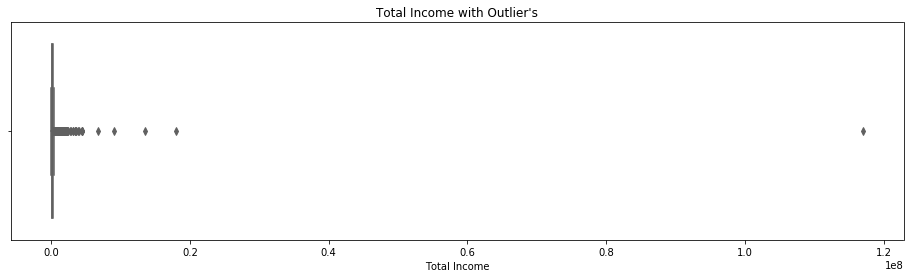

Displaying count and distibution of AMT_INCOME_TOTAL without outlier's:


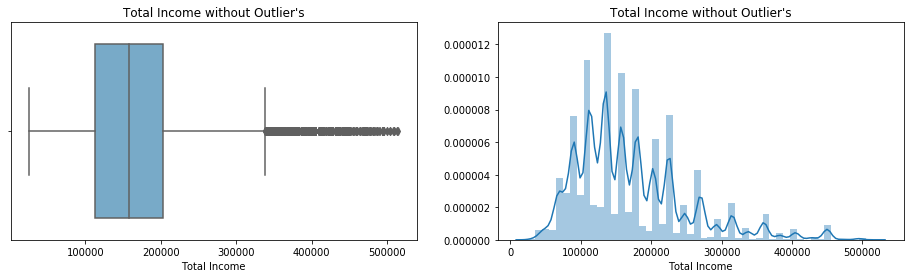

In [28]:
# Outlier detection of AMT_INCOME_TOTAL

print("Displaying count and distibution of AMT_INCOME_TOTAL with outlier's:")

# Count of AMT_INCOME_TOTAL with outlier's
plt.figure(figsize=(16, 4))
plt.title("Total Income with Outlier's" )
sns.boxplot( x =application_df_after_rowcoldrop['AMT_INCOME_TOTAL'], palette="Blues")
plt.xlabel("Total Income")
plt.show()

#Removing outliers for visualization
AMT_INCOME_TOTAL_WO_OUTLIERS = application_df_after_rowcoldrop[application_df_after_rowcoldrop['AMT_INCOME_TOTAL'] < application_df_after_rowcoldrop['AMT_INCOME_TOTAL'].quantile(0.99)]

print("Displaying count and distibution of AMT_INCOME_TOTAL without outlier's:")

# Count of AMT_INCOME_TOTAL without outlier's
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.title("Total Income without Outlier's" )
sns.boxplot(x =AMT_INCOME_TOTAL_WO_OUTLIERS['AMT_INCOME_TOTAL'], palette="Blues")
plt.xlabel("Total Income")

plt.subplot(1,2,2)
plt.title("Total Income without Outlier's" )
sns.distplot(AMT_INCOME_TOTAL_WO_OUTLIERS['AMT_INCOME_TOTAL'])
plt.xlabel("Total Income")
plt.show()


-  ### Substep 2.8: Binning of Variables
     - ### Subtask 2.8.1: Binning of Continuous Variables

In [29]:
# Binning for Age
cut_labels_Age = ['20-30', '30-40', '40-50', '>50']
cut_bins_Age = [19, 30, 40, 50, 1000]
application_df_after_rowcoldrop['YEARS_BIRTH_BIN'] = pd.cut(application_df_after_rowcoldrop['YEARS_BIRTH'], bins=cut_bins_Age, labels=cut_labels_Age)
print("Binning values for YEARS_BIRTH: ")
print(application_df_after_rowcoldrop['YEARS_BIRTH_BIN'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For Years Employed
cut_labels_EmpYears = ['<1', '1-5', '5-10', '10-20', '20-30', '30-40', '>40']
cut_bins_EmpYears = [-1, 1, 5, 10, 20, 30, 40, 1000]
application_df_after_rowcoldrop['YEARS_EMPLOYED_BIN'] = pd.cut(application_df_after_rowcoldrop['YEARS_EMPLOYED'], bins=cut_bins_EmpYears, labels=cut_labels_EmpYears)
print("Binning values for YEARS_EMPLOYED:")
print(application_df_after_rowcoldrop['YEARS_EMPLOYED_BIN'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For AMT_INCOME_TOTAL
cut_labels_AMT_INC = ['<25000', '25000-50000', '50000-100000', '>100000']
cut_bins_AMT_INC = [-1, 250000, 500000, 1000000, 10000000000]
application_df_after_rowcoldrop['AMT_INCOME_TOTAL_BIN'] = pd.cut(application_df_after_rowcoldrop['AMT_INCOME_TOTAL'], bins=cut_bins_AMT_INC, labels=cut_labels_AMT_INC)
print("Binning values for AMT_INCOME_TOTAL:")
print(application_df_after_rowcoldrop['AMT_INCOME_TOTAL_BIN'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For AMT_GOODS_PRICE
cut_labels_AMT_GOODS_PRICE = ['<500000', '>500000']
cut_bins_AMT_GOODS_PRICE = [-1, 500000, 10000000000]
application_df_after_rowcoldrop['AMT_GOODS_PRICE_BIN'] = pd.cut(application_df_after_rowcoldrop['AMT_GOODS_PRICE'], bins=cut_bins_AMT_GOODS_PRICE, labels=cut_labels_AMT_GOODS_PRICE)
print("Binning values for AMT_GOODS_PRICE:")
print(application_df_after_rowcoldrop['AMT_GOODS_PRICE_BIN'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For AMT_ANNUITY
cut_labels_AMT_ANNUITY = ['<5000', '5000-10000', '10000-15000', '15000-20000', '>20000']
cut_bins_AMT_ANNUITY = [-1, 5000, 10000, 15000, 20000, 10000000]
application_df_after_rowcoldrop['AMT_ANNUITY_BIN'] = pd.cut(application_df_after_rowcoldrop['AMT_ANNUITY'], bins=cut_bins_AMT_ANNUITY, labels=cut_labels_AMT_ANNUITY)
print("Binning values for AMT_ANNUITY:")
print(application_df_after_rowcoldrop['AMT_ANNUITY_BIN'].value_counts())


print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For CNT_CHILDREN_BIN
application_df_after_rowcoldrop['CNT_CHILDREN_BIN'] = application_df_after_rowcoldrop['CNT_CHILDREN'].apply(lambda x : x if x<4 else 'More Than 4')
print("Binning values for CNT_CHILDREN:")
print(application_df_after_rowcoldrop['CNT_CHILDREN_BIN'].value_counts())

print("\n---------------------------------------------------------------------------------------------------\n")

# Binning For CNT_FAM_MEMBERS
application_df_after_rowcoldrop['CNT_FAM_MEMBERS_BIN'] = application_df_after_rowcoldrop['CNT_FAM_MEMBERS'].apply(lambda x : x if x<=4 else 'Above 4')
print("Binning values for CNT_FAM_MEMBERS:")
print(application_df_after_rowcoldrop['CNT_FAM_MEMBERS_BIN'].value_counts())

Binning values for YEARS_BIRTH: 
30-40    81803
40-50    74718
>50      50727
20-30    44883
Name: YEARS_BIRTH_BIN, dtype: int64

---------------------------------------------------------------------------------------------------

Binning values for YEARS_EMPLOYED:
1-5      108327
5-10      64870
10-20     38398
<1        27981
20-30      9550
30-40      2771
>40         234
Name: YEARS_EMPLOYED_BIN, dtype: int64

---------------------------------------------------------------------------------------------------

Binning values for AMT_INCOME_TOTAL:
<25000          216001
25000-50000      33587
50000-100000      2303
>100000            240
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

---------------------------------------------------------------------------------------------------

Binning values for AMT_GOODS_PRICE:
<500000    147697
>500000    104434
Name: AMT_GOODS_PRICE_BIN, dtype: int64

------------------------------------------------------------------------------------------------

   - ### Subtask 2.8.2: Binning of Categorical Variables

In [30]:
# Transformation of Income Type
print("Displaying the frequency of Income Type:")
display(application_df_after_rowcoldrop.NAME_INCOME_TYPE.value_counts())

print("We could see that we have more clients who has income type as Working.")
print("Since Student, Businessman, Pensioner and Maternity leave have negligible amount of value we can join these values to a single value as 'Others'")

# Function for binning
def replacingWithOthers(x):
    others = ['Student', 'Businessman', 'Pensioner', 'Maternity leave']
    if x in others:
        return 'Others'
    else:
        return x

# Binning operation
application_df_after_rowcoldrop['NAME_INCOME_TYPE'] = application_df_after_rowcoldrop['NAME_INCOME_TYPE'].apply(replacingWithOthers)

print("\nFrequency of Income Type after binning:")
application_df_after_rowcoldrop.NAME_INCOME_TYPE.value_counts()

Displaying the frequency of Income Type:


Working                 158771
Commercial associate     71614
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

We could see that we have more clients who has income type as Working.
Since Student, Businessman, Pensioner and Maternity leave have negligible amount of value we can join these values to a single value as 'Others'

Frequency of Income Type after binning:


Working                 158771
Commercial associate     71614
State servant            21703
Others                      43
Name: NAME_INCOME_TYPE, dtype: int64

## Step 3: Analysis
<br>

-  ### Substep 3.1: Imbalance Percentage

Visualizing imbalance percentage with respect to TARGET variable:


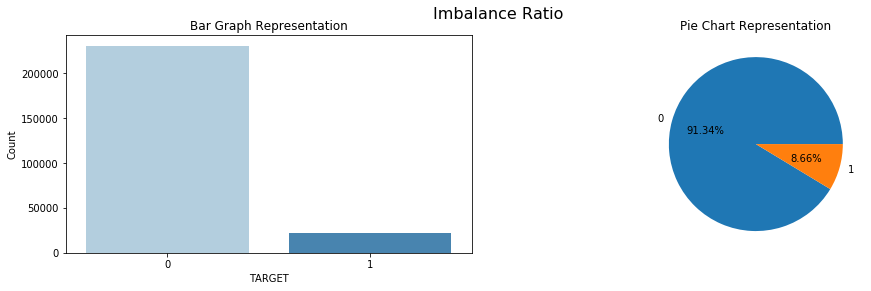

In [31]:
# Imbalance Percentage
print("Visualizing imbalance percentage with respect to TARGET variable:")
plt.figure(figsize=(16, 4))
plt.suptitle("Imbalance Ratio",fontsize=16)
plt.subplot(1, 2, 1,title='Bar Graph Representation')
sns.countplot(data = application_df_after_rowcoldrop, x= 'TARGET', order=application_df_after_rowcoldrop['TARGET'].value_counts().index,palette='Blues')
plt.ylabel("Count")

plt.subplot(1, 2, 2,title='Pie Chart Representation')
plt.pie(list(application_df_after_rowcoldrop.TARGET.value_counts().values), labels = list(application_df_after_rowcoldrop.TARGET.value_counts().index),autopct='%1.2f%%')
plt.show()

We have 91.34% of applicants who has correctly paid the loan and with 8.66% of applicants who has defaulted. From the above charts it is clear that we have an imbalance ratio between the target variable. 

-  ### Substep 3.2: Divide Data Sets Based on Target

In [32]:
# Dividing the DataFrame based on the Target.

application_df_after_rowcoldrop_t0 = application_df_after_rowcoldrop[(application_df_after_rowcoldrop['TARGET'] == 0)]
application_df_after_rowcoldrop_t1 = application_df_after_rowcoldrop[(application_df_after_rowcoldrop['TARGET'] == 1)]

# Printing heads of DataFrame after seperating
print("Printing first five rows of the DataFrame which has 'TARGET' as 0 :")
display(application_df_after_rowcoldrop_t0.head(5))
print("Printing five rows of the DataFrame which has 'TARGET' as 1 :")
display(application_df_after_rowcoldrop_t1.head(5))

print("Number of clients who were not defaulted : {0}".format(len(application_df_after_rowcoldrop_t0)))
print("Number of clients who were defaulted : {0}".format(len(application_df_after_rowcoldrop_t1)))

Printing first five rows of the DataFrame which has 'TARGET' as 0 :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,YEARS_BIRTH,YEARS_BIRTH_BIN,YEARS_EMPLOYED_BIN,AMT_INCOME_TOTAL_BIN,AMT_GOODS_PRICE_BIN,AMT_ANNUITY_BIN,CNT_CHILDREN_BIN,CNT_FAM_MEMBERS_BIN
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,Core staff,2.000000,1,1,MONDAY,0,0,0,0,0,0,School,828,3.254795,45.931507,40-50,1-5,25000-50000,>500000,>20000,0,2.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,2531,Laborers,1.000000,2,2,MONDAY,0,0,0,0,0,0,Government,815,0.616438,52.180822,>50,<1,<25000,<500000,5000-10000,0,1.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,2437,Laborers,2.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,617,8.326027,52.068493,>50,5-10,<25000,<500000,>20000,0,2.000000
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,3458,Core staff,1.000000,2,2,THURSDAY,0,0,0,0,1,1,Religion,1106,8.323288,54.608219,>50,5-10,<25000,>500000,>20000,0,1.000000
5,100008,0,Cash loans,M,N,Y,0,99000.000000,490495.500000,27517.500000,454500.000000,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,477,Laborers,2.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Other,2536,4.350685,46.413699,40-50,1-5,<25000,<500000,>20000,0,2.000000


Printing five rows of the DataFrame which has 'TARGET' as 1 :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,YEARS_BIRTH,YEARS_BIRTH_BIN,YEARS_EMPLOYED_BIN,AMT_INCOME_TOTAL_BIN,AMT_GOODS_PRICE_BIN,AMT_ANNUITY_BIN,CNT_CHILDREN_BIN,CNT_FAM_MEMBERS_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,2120,Laborers,1.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,1134,1.745205,25.920548,20-30,1-5,<25000,<500000,>20000,0,1.000000
23,100031,1,Cash loans,F,N,Y,0,112500.000000,979992.000000,27076.500000,702000.000000,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,1827,Cooking staff,1.000000,3,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,161,7.200000,51.298630,>50,5-10,<25000,>500000,>20000,0,1.000000
36,100047,1,Cash loans,M,N,Y,0,202500.000000,1193580.000000,35028.000000,855000.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1029,Laborers,2.000000,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,1075,3.457534,47.895890,40-50,1-5,<25000,>500000,>20000,0,2.000000
38,100049,1,Cash loans,F,N,N,0,135000.000000,288873.000000,16258.500000,238500.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,4409,Sales staff,2.000000,3,3,THURSDAY,0,0,0,0,0,0,Self-employed,1480,9.854795,36.668493,30-40,5-10,<25000,<500000,15000-20000,0,2.000000
82,100112,1,Cash loans,M,Y,Y,0,315000.000000,953460.000000,64107.000000,900000.000000,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,10199,2015,1038,Unknown,1.000000,2,2,SUNDAY,0,0,0,0,1,1,Industry: type 4,591,5.520548,27.942466,20-30,5-10,25000-50000,>500000,>20000,0,1.000000


Number of clients who were not defaulted : 230296
Number of clients who were defaulted : 21835


-  ### Substep 3.3: Univariate Analysis for Categorical Variables

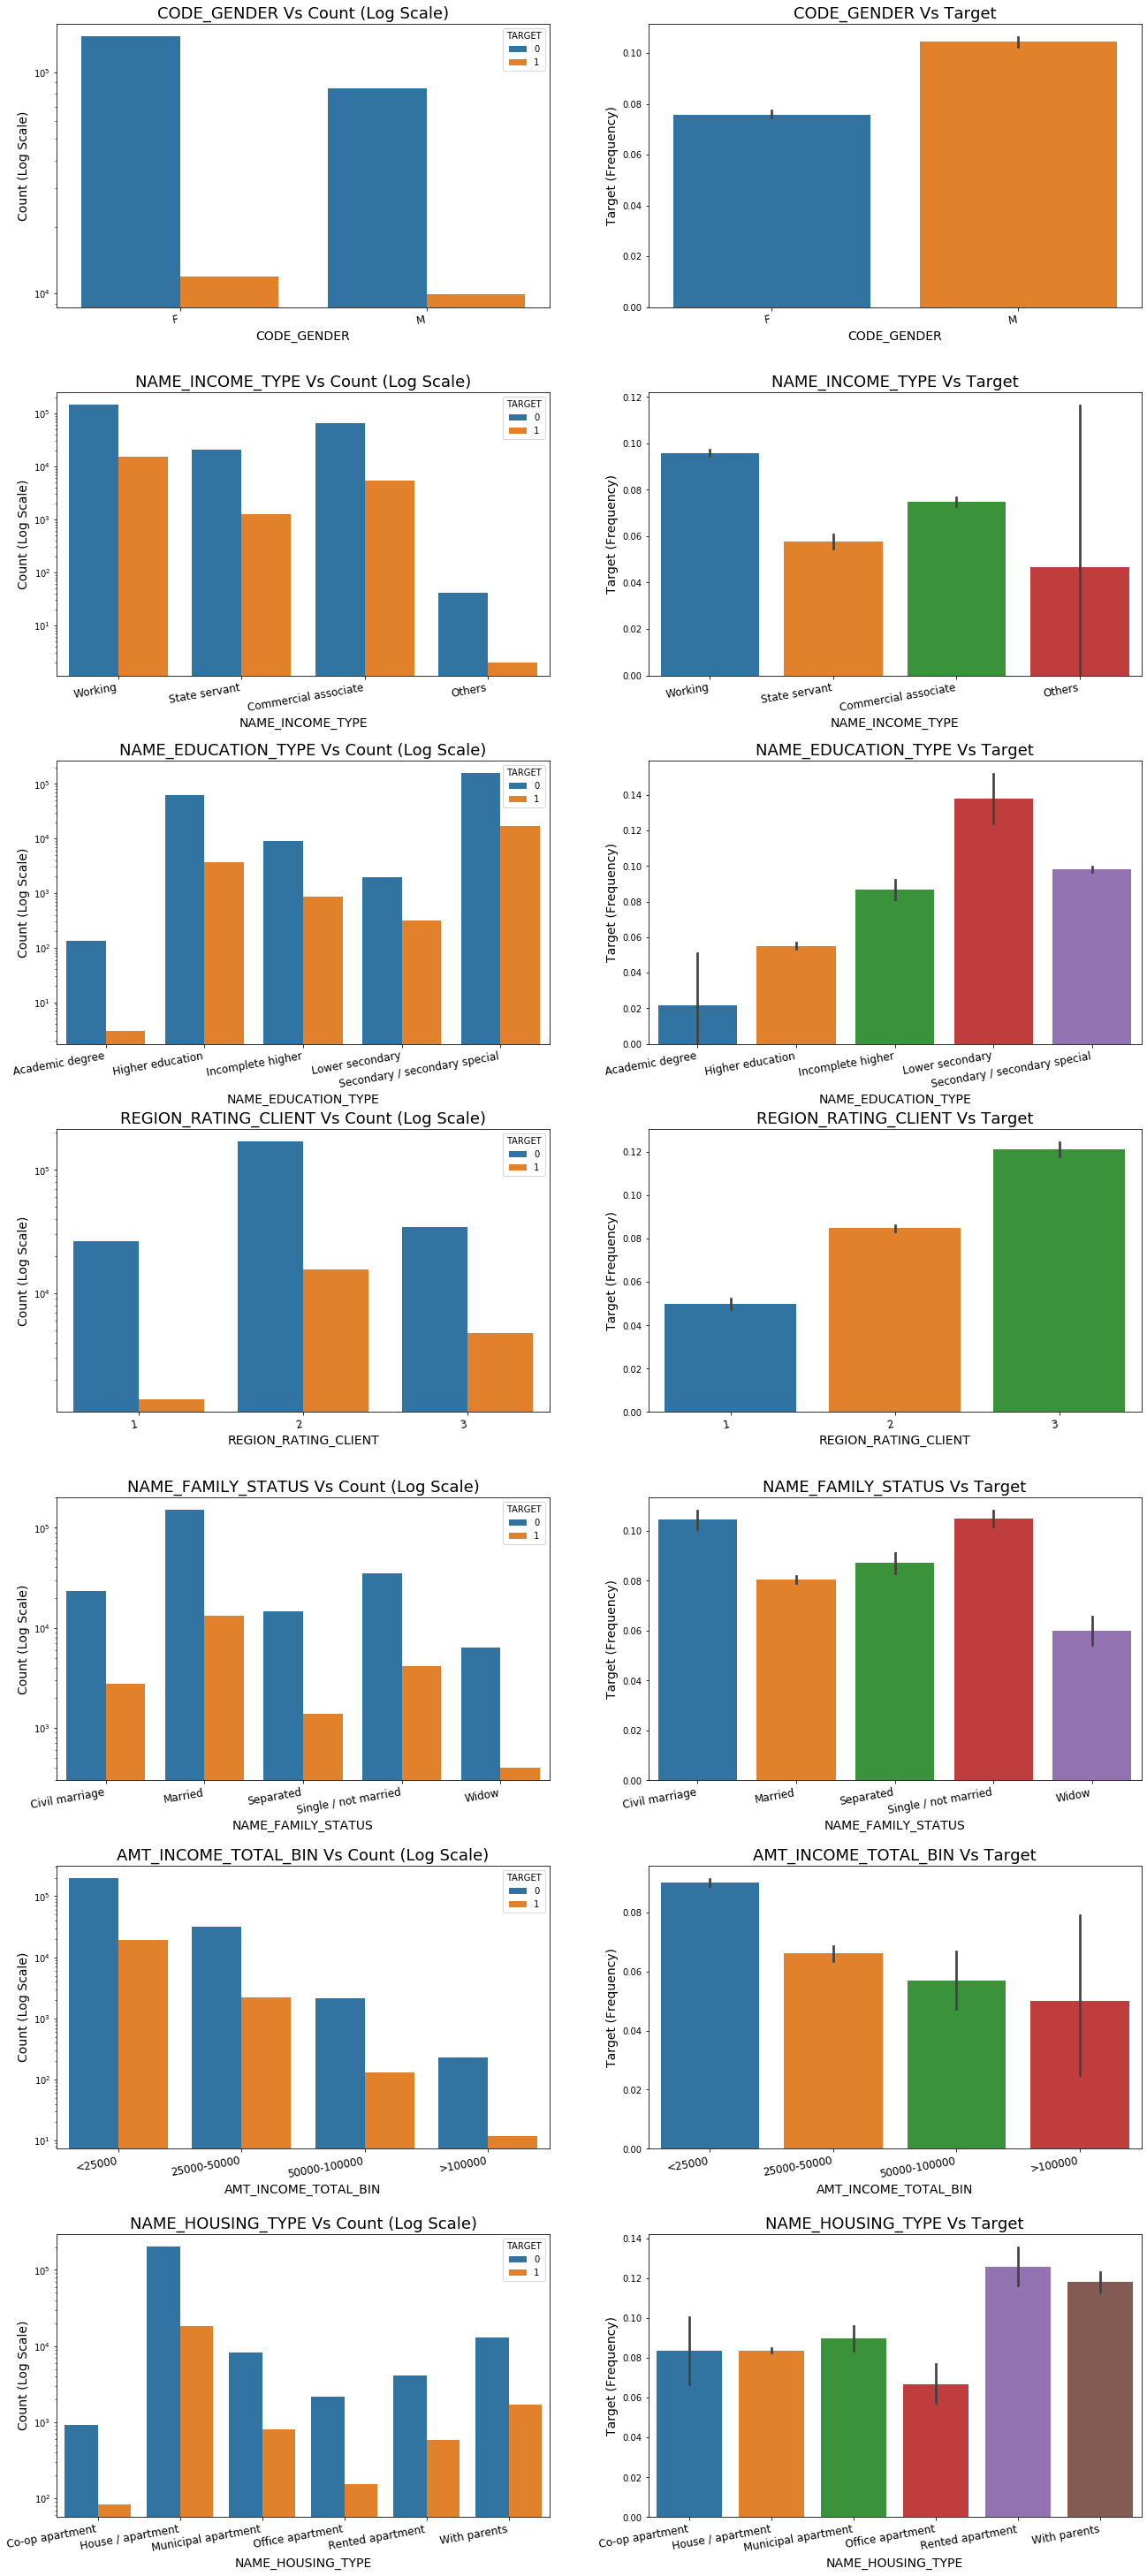

In [33]:
# Shortlisting Categories for which Univariate Analysis is to be done
features = ['CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 
            'AMT_INCOME_TOTAL_BIN', 'NAME_HOUSING_TYPE']

# Setting optimal figure size so that there is no overlap
plt.figure(figsize=(22, 40))

# Logic for performing univariate analysis for all the shortlisted categorical variables at once
j = 0
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for i in enumerate(features):
    # For plotting Count Distribution
    j = j + 1
    plt.subplot(7, 2, j)
    sns.countplot(x=i[1], hue= 'TARGET', data=application_df_after_rowcoldrop)
    # Setting log scale for count plot as lower values are not visible clearly in the graph
    plt.yscale('log')
    title = i[1] + ' Vs Count (Log Scale)'
    # Setting labels
    plt.title(title, fontsize=18)
    plt.xlabel(i[1], fontsize=14)
    plt.ylabel("Count (Log Scale)",fontsize=14)
    plt.xticks(
        rotation=10, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
    
    # For plotting Frequency Distribution
    j = j + 1
    plt.subplot(7, 2, j)
    sns.barplot(x=i[1], y='TARGET', data=application_df_after_rowcoldrop)
    # Setting labels
    title = i[1] + ' Vs Target'
    plt.title(title, fontsize=18)
    plt.xlabel(i[1], fontsize=14)
    plt.ylabel("Target (Frequency)", fontsize=14)
    plt.xticks(
        rotation=10, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large'  
    )
plt.show()

-  ### Substep 3.4: Correlation Analysis

In [34]:
# Correlation  for t0

# Removing unnecessary columns for correlation analysis
corr_application_df_after_rowcoldrop_t0 = application_df_after_rowcoldrop_t0.loc[:, 
                                          application_df_after_rowcoldrop_t0.columns.difference(['YEARS_EMPLOYED', 
                                          'YEARS_BIRTH', 'YEARS_BIRTH_BIN',
                                          'YEARS_EMPLOYED_BIN'])]

# Performing Correlation
corr_application_df_after_rowcoldrop_t0= corr_application_df_after_rowcoldrop_t0.corr()
print("Correlation for target 0:")
display(corr_application_df_after_rowcoldrop_t0)

print("\n---------------------------------------------------------------------------------------------------\n")

print("Altering the correlation DataFrame to extract the top correlated values...")

print("\n---------------------------------------------------------------------------------------------------\n")

# Making the lower diagonal of DataFrame as NaN as they are repeated and same variable correlation analysis.
corr_application_df_after_rowcoldrop_t0 = corr_application_df_after_rowcoldrop_t0.where(np.triu(np.ones(corr_application_df_after_rowcoldrop_t0.shape), k=1).astype(np.bool))

# Unstacking the correlation DataFrame
corr_application_df_after_rowcoldrop_t0 = corr_application_df_after_rowcoldrop_t0.unstack().reset_index()

# Setting the nme of columns
corr_application_df_after_rowcoldrop_t0.columns = ['Parameter 1', 'Parameter 2', 'Correlation']

# Dropping null values
corr_application_df_after_rowcoldrop_t0.dropna(subset = ['Correlation'], inplace = True)

# Rounding off correlation values
corr_application_df_after_rowcoldrop_t0['Correlation'] = round(corr_application_df_after_rowcoldrop_t0['Correlation'], 2).abs()

print("10 most correlated values for target 0:")
top_10_corr_appdf_t0 = corr_application_df_after_rowcoldrop_t0.nlargest(10, 'Correlation')
display(top_10_corr_appdf_t0)

Correlation for target 0:


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,SK_ID_CURR,TARGET
AMT_ANNUITY,1.000000,0.762102,0.766657,0.400754,-0.007603,0.041240,0.091574,0.052480,0.025993,0.060868,0.122212,-0.001188,nan
AMT_CREDIT,0.762102,1.000000,0.986474,0.326159,-0.018697,0.036768,0.152661,0.087510,0.034917,0.069834,0.103882,-0.000786,nan
AMT_GOODS_PRICE,0.766657,0.986474,1.000000,0.333298,-0.022284,0.034900,0.146859,0.088622,0.036692,0.071801,0.107027,-0.000401,nan
AMT_INCOME_TOTAL,0.400754,0.326159,0.333298,1.000000,-0.009814,-0.003129,0.045552,0.030105,0.026452,0.034048,0.169312,0.001426,nan
CNT_CHILDREN,-0.007603,-0.018697,-0.022284,-0.009814,1.000000,0.893274,-0.242466,-0.063033,0.117742,0.002416,-0.030355,-0.000475,nan
CNT_FAM_MEMBERS,0.041240,0.036768,0.034900,-0.003129,0.893274,1.000000,-0.178010,-0.031520,0.109784,0.025372,-0.028818,-0.001375,nan
DAYS_BIRTH,0.091574,0.152661,0.146859,0.045552,-0.242466,-0.178010,1.000000,0.352649,0.108047,0.136726,0.041152,0.001019,nan
DAYS_EMPLOYED,0.052480,0.087510,0.088622,0.030105,-0.063033,-0.031520,0.352649,1.000000,0.086672,0.135765,-0.008658,0.000021,nan
DAYS_ID_PUBLISH,0.025993,0.034917,0.036692,0.026452,0.117742,0.109784,0.108047,0.086672,1.000000,0.104178,0.004022,-0.000187,nan
DAYS_LAST_PHONE_CHANGE,0.060868,0.069834,0.071801,0.034048,0.002416,0.025372,0.136726,0.135765,0.104178,1.000000,0.043368,-0.000350,nan



---------------------------------------------------------------------------------------------------

Altering the correlation DataFrame to extract the top correlated values...

---------------------------------------------------------------------------------------------------

10 most correlated values for target 0:


,Parameter 1,Parameter 2,Correlation
27,AMT_GOODS_PRICE,AMT_CREDIT,0.990000
69,CNT_FAM_MEMBERS,CNT_CHILDREN,0.890000
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.770000
13,AMT_CREDIT,AMT_ANNUITY,0.760000
39,AMT_INCOME_TOTAL,AMT_ANNUITY,0.400000
97,DAYS_EMPLOYED,DAYS_BIRTH,0.350000
40,AMT_INCOME_TOTAL,AMT_CREDIT,0.330000
41,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.330000
82,DAYS_BIRTH,CNT_CHILDREN,0.240000
83,DAYS_BIRTH,CNT_FAM_MEMBERS,0.180000


In [35]:
# Performing correlation operation for Target 1

# Removing unnecessary columns for correlation analysis
corr_application_df_after_rowcoldrop_t1 = application_df_after_rowcoldrop_t1.loc[:, 
                                          application_df_after_rowcoldrop_t1.columns.difference(['YEARS_EMPLOYED', 
                                          'YEARS_BIRTH', 'YEARS_BIRTH_BIN',
                                          'YEARS_EMPLOYED_BIN'])]
# Performing Correlation
corr_application_df_after_rowcoldrop_t1= corr_application_df_after_rowcoldrop_t1.corr()

# Making the lower diagonal of DataFrame as NaN as they are repeated and same variable correlation analysis.
corr_application_df_after_rowcoldrop_t1 = corr_application_df_after_rowcoldrop_t1.where(np.triu(np.ones(corr_application_df_after_rowcoldrop_t1.shape), k=1).astype(np.bool))

# Unstacking the correlation DataFrame
corr_application_df_after_rowcoldrop_t1 = corr_application_df_after_rowcoldrop_t1.unstack().reset_index()

# Setting the nme of columns
corr_application_df_after_rowcoldrop_t1.columns = ['Parameter 1', 'Parameter 2', 'Correlation']

# Dropping null values
corr_application_df_after_rowcoldrop_t1.dropna(subset = ['Correlation'], inplace = True)

# Rounding off correlation values
corr_application_df_after_rowcoldrop_t1['Correlation'] = round(corr_application_df_after_rowcoldrop_t1['Correlation'], 2).abs()

print("10 most correlated values for Target 1:")
top_10_corr_appdf_t1 = corr_application_df_after_rowcoldrop_t1.nlargest(10, 'Correlation')
display(top_10_corr_appdf_t1)

10 most correlated values for Target 1:


,Parameter 1,Parameter 2,Correlation
27,AMT_GOODS_PRICE,AMT_CREDIT,0.980000
69,CNT_FAM_MEMBERS,CNT_CHILDREN,0.890000
13,AMT_CREDIT,AMT_ANNUITY,0.750000
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.750000
97,DAYS_EMPLOYED,DAYS_BIRTH,0.310000
79,DAYS_BIRTH,AMT_CREDIT,0.190000
80,DAYS_BIRTH,AMT_GOODS_PRICE,0.190000
82,DAYS_BIRTH,CNT_CHILDREN,0.180000
124,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,0.170000
123,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,0.150000


In [36]:
# Comparing the correlation for Target 0 and Target 1

print('Comparing the two DataFrames:')

print('We can see that there are few pairs which are highly correlated in both target 0 and target 1, They are:')

list_mutual_corr_app = list(top_10_corr_appdf_t0.index.intersection(top_10_corr_appdf_t1.index))

top_corr_appdf_t01 = corr_application_df_after_rowcoldrop_t1[['Parameter 1', 'Parameter 2']].loc[list_mutual_corr_app]
display(top_corr_appdf_t01)

Comparing the two DataFrames:
We can see that there are few pairs which are highly correlated in both target 0 and target 1, They are:


,Parameter 1,Parameter 2
27,AMT_GOODS_PRICE,AMT_CREDIT
69,CNT_FAM_MEMBERS,CNT_CHILDREN
26,AMT_GOODS_PRICE,AMT_ANNUITY
13,AMT_CREDIT,AMT_ANNUITY
97,DAYS_EMPLOYED,DAYS_BIRTH
82,DAYS_BIRTH,CNT_CHILDREN


-  ### Substep 3.5: Univariate Analysis for Numerical Variables

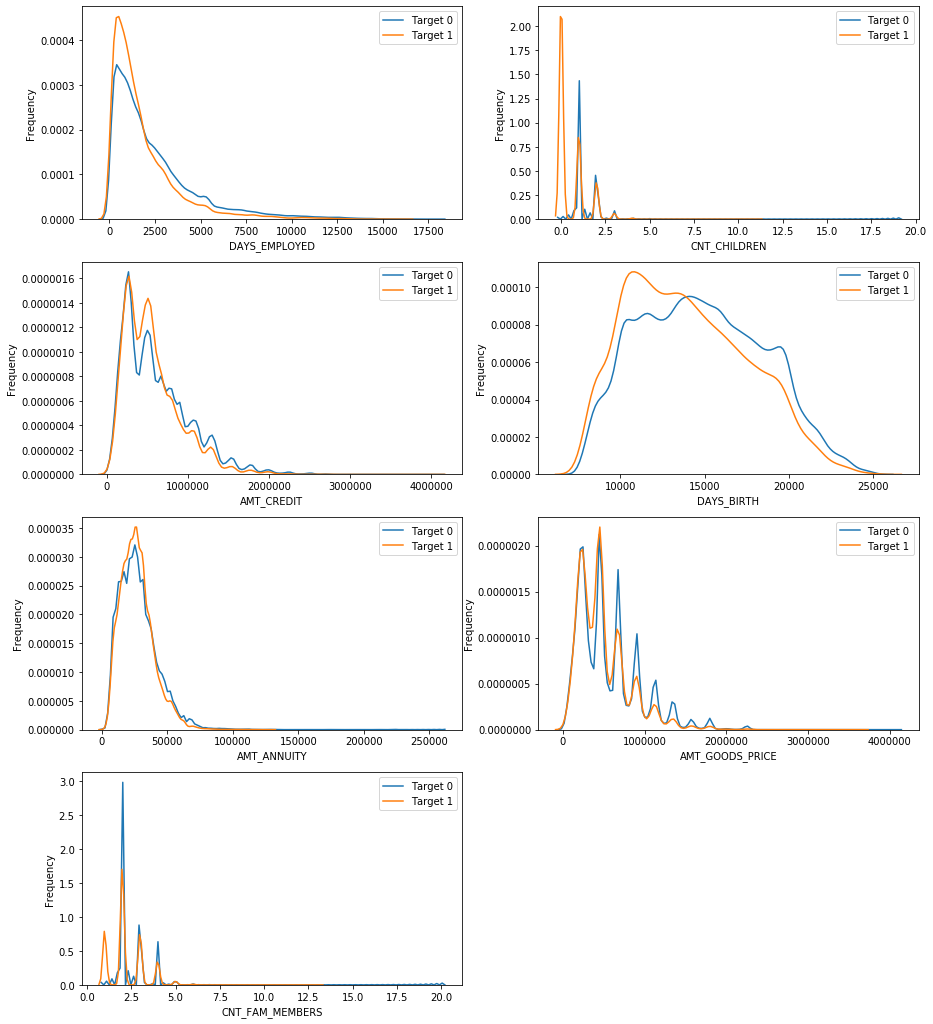

In [37]:
features = list(set(top_corr_appdf_t01['Parameter 1']) | set(top_corr_appdf_t01['Parameter 2']))
features_len = len(features)
plt.figure(figsize=(15, 18))
for i in enumerate(features):
    plt.subplot(4, 2, i[0]+1)
    sns.distplot(application_df_after_rowcoldrop_t0[i[1]], hist = False, label="Target 0")
    sns.distplot(application_df_after_rowcoldrop_t1[i[1]], hist = False, label="Target 1")
    plt.ylabel('Frequency')

-  ### Substep 3.6: Bivariate Analysis for Numerical Variables

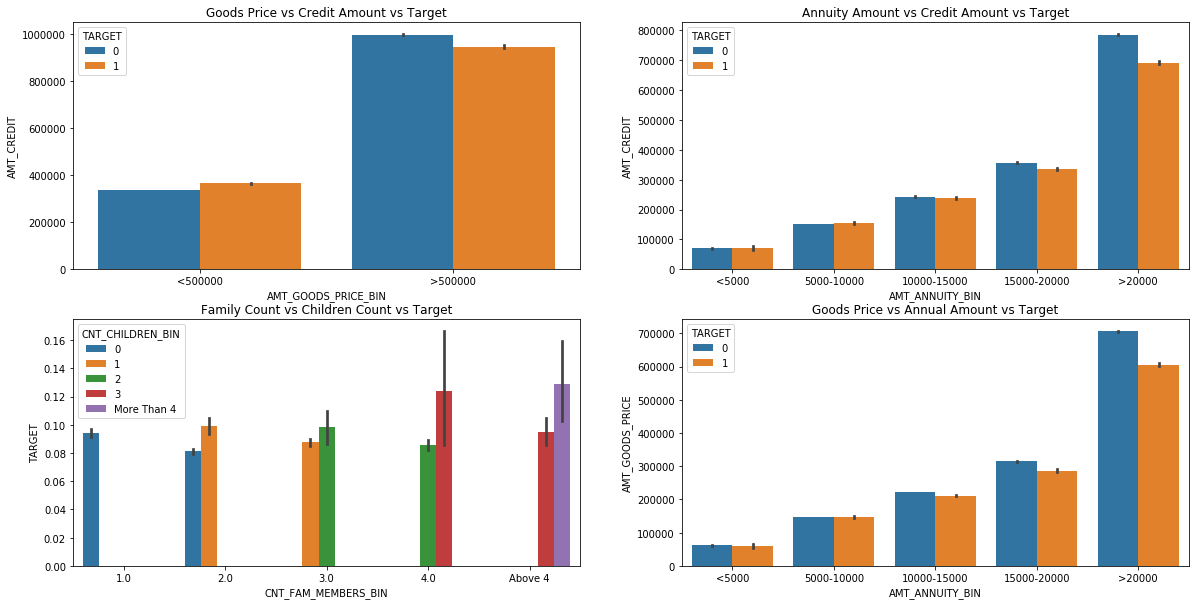

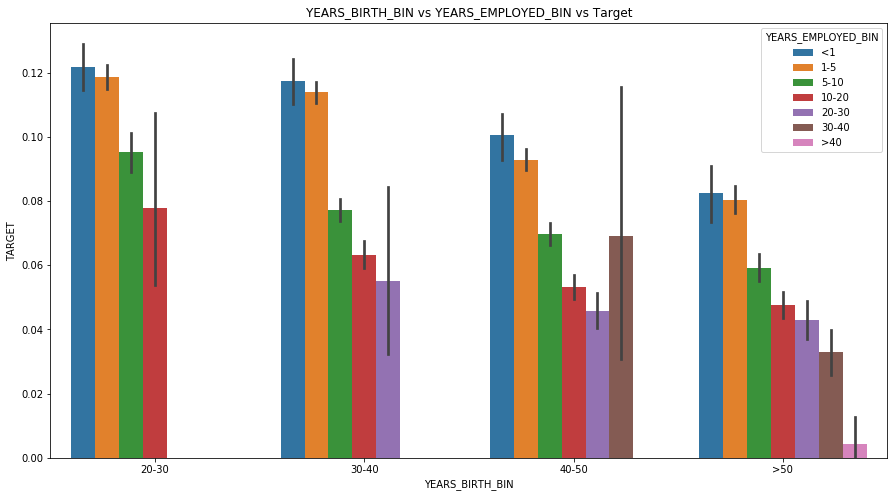

In [38]:
plt.figure(figsize=(20, 10))

# Goods Price vs Target vs Credit Amount
plt.subplot(2, 2, 1)
plt.title('Goods Price vs Credit Amount vs Target')
sns.barplot(x='AMT_GOODS_PRICE_BIN', y='AMT_CREDIT', data=application_df_after_rowcoldrop, hue='TARGET')
plt.xlabel('AMT_GOODS_PRICE_BIN')
plt.ylabel('AMT_CREDIT')

# Annuity Amount vs Target vs Credit Amount
plt.subplot(2, 2, 2)
plt.title('Annuity Amount vs Credit Amount vs Target')
sns.barplot(x='AMT_ANNUITY_BIN', y='AMT_CREDIT', data=application_df_after_rowcoldrop, hue='TARGET')
plt.xlabel('AMT_ANNUITY_BIN')
plt.ylabel('AMT_CREDIT')

# Family Count vs Target vs Children Count
plt.subplot(2, 2, 3)
plt.title('Family Count vs Children Count vs Target')
sns.barplot(x='CNT_FAM_MEMBERS_BIN', y='TARGET', data=application_df_after_rowcoldrop, hue='CNT_CHILDREN_BIN')
plt.xlabel('CNT_FAM_MEMBERS_BIN')
plt.ylabel('TARGET')

# 
plt.subplot(2, 2, 4)
plt.title('Goods Price vs Annual Amount vs Target')
sns.barplot(x='AMT_ANNUITY_BIN', y='AMT_GOODS_PRICE', data=application_df_after_rowcoldrop, hue='TARGET')
plt.xlabel('AMT_ANNUITY_BIN')
plt.ylabel('AMT_GOODS_PRICE')

plt.figure(figsize=(15, 8))
plt.subplot(1, 1, 1)
plt.title('YEARS_BIRTH_BIN vs YEARS_EMPLOYED_BIN vs Target')
sns.barplot(x='YEARS_BIRTH_BIN', y='TARGET', data=application_df_after_rowcoldrop, hue='YEARS_EMPLOYED_BIN')
plt.xlabel('YEARS_BIRTH_BIN')
plt.ylabel('TARGET')
plt.show()

## Step 4: Combine Current and Previous Application Data for Analysis
<br>

-  ### Substep 4.1: Read DataFrame from another Python sheet

#### Note: Run the Previous Application python notebook before running the below blocks of code

In [39]:
#run all the commands in the another python sheet before reading the DataFrame
%store -r prev_app_after_rowcoldrop

print("Sanity check:\n")
print("Displaying the first 5 rows of the DataFrame:")
prev_app_after_rowcoldrop.head(5)

Sanity check:

Displaying the first 5 rows of the DataFrame:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,XAP,Approved,-73,XAP,Repeater,Mobile,POS,XNA,Country-wide,middle,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,XNA,Approved,-164,XAP,Repeater,XNA,Cash,x-sell,Contact center,low_action,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,112500.000000,XNA,Approved,-301,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,high,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,450000.000000,XNA,Approved,-512,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,middle,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,337500.000000,Repairs,Refused,-781,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,high,0.000000


-  ### Substep 4.2: Merge DataFrame

In [40]:
# Merge the dataframe using inner join on SK_ID_CURR
df_merged = pd.merge(application_df_after_rowcoldrop, prev_app_after_rowcoldrop, how='inner', on='SK_ID_CURR')
print("Displaying the merged DataFrame:")
display(df_merged.head(5))

Displaying the merged DataFrame:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,YEARS_BIRTH,YEARS_BIRTH_BIN,YEARS_EMPLOYED_BIN,AMT_INCOME_TOTAL_BIN,AMT_GOODS_PRICE_BIN,AMT_ANNUITY_BIN,CNT_CHILDREN_BIN,CNT_FAM_MEMBERS_BIN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,2120,Laborers,1.000000,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,1134,1.745205,25.920548,20-30,1-5,<25000,<500000,>20000,0,1.000000,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,179055.000000,XAP,Approved,-606,XAP,New,Vehicles,POS,XNA,Stone,low_normal,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,Core staff,2.000000,1,1,MONDAY,0,0,0,0,0,0,School,828,3.254795,45.931507,40-50,1-5,25000-50000,>500000,>20000,0,2.000000,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,900000.000000,XNA,Approved,-746,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,low_normal,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,Core staff,2.000000,1,1,MONDAY,0,0,0,0,0,0,School,828,3.254795,45.931507,40-50,1-5,25000-50000,>500000,>20000,0,2.000000,2636178,Consumer loans,64567.665000,337500.000000,348637.500000,337500.000000,XAP,Approved,-828,XAP,Refreshed,Furniture,POS,XNA,Stone,middle,0.000000
3,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,291,Core staff,2.000000,1,1,MONDAY,0,0,0,0,0,0,School,828,3.254795,45.931507,40-50,1-5,25000-50000,>500000,>20000,0,2.000000,2396755,Consumer loans,6737.310000,68809.500000,68053.500000,68809.500000,XAP,Approved,-2341,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,middle,1.000000
4,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,2531,Laborers,1.000000,2,2,MONDAY,0,0,0,0,0,0,Government,815,0.616438,52.180822,>50,<1,<25000,<500000,5000-10000,0,1.000000,1564014,Consumer loans,5357.250000,24282.000000,20106.000000,24282.000000,XAP,Approved,-815,XAP,New,Mobile,POS,XNA,Regional / Local,middle,0.000000


-  ### Substep 4.1: Analysis
    - ### Subtasl 4.1.1: Univariate Analysis

Visualizing Contract Status:


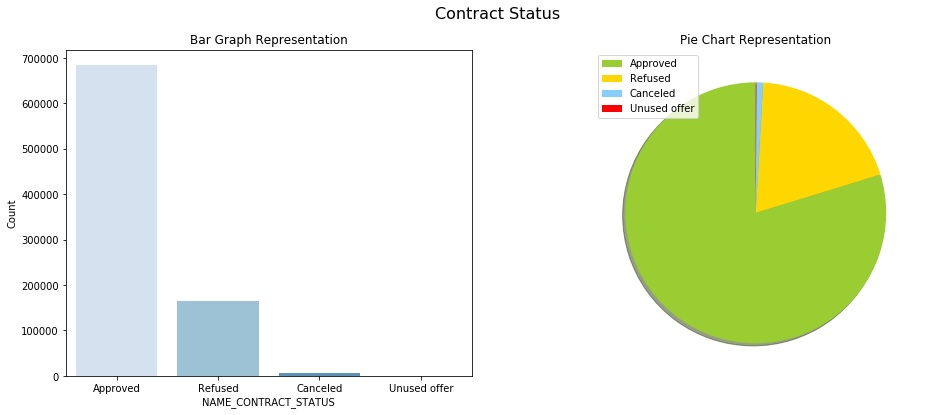

Percentage Split up of NAME_CONTRACT_STATUS
Approved       79.750000
Refused        19.340000
Canceled        0.830000
Unused offer    0.090000
Name: NAME_CONTRACT_STATUS, dtype: float64


In [41]:
print("Visualizing Contract Status:")
plt.figure(figsize=(16, 6))
plt.suptitle("Contract Status",fontsize=16)
plt.subplot(1, 2, 1,title='Bar Graph Representation')
sns.countplot(data = df_merged, x= 'NAME_CONTRACT_STATUS', order=df_merged['NAME_CONTRACT_STATUS'].value_counts().index,palette='Blues')
plt.ylabel("Count")

# plt.figure(figsize=(16, 10))
pie_labels = list(df_merged['NAME_CONTRACT_STATUS'].value_counts().index)
pie_vals = list(df_merged['NAME_CONTRACT_STATUS'].value_counts().values)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'red']
plt.subplot(1, 2, 2,title='Pie Chart Representation')
patches, texts = plt.pie(pie_vals, colors=colors, shadow=True, startangle=90)
plt.legend(patches, pie_labels, loc="best")
plt.show()

print("Percentage Split up of NAME_CONTRACT_STATUS")
print(round((df_merged['NAME_CONTRACT_STATUS'].value_counts()/len(df_merged)*100), 2))

Univariate Analysis :



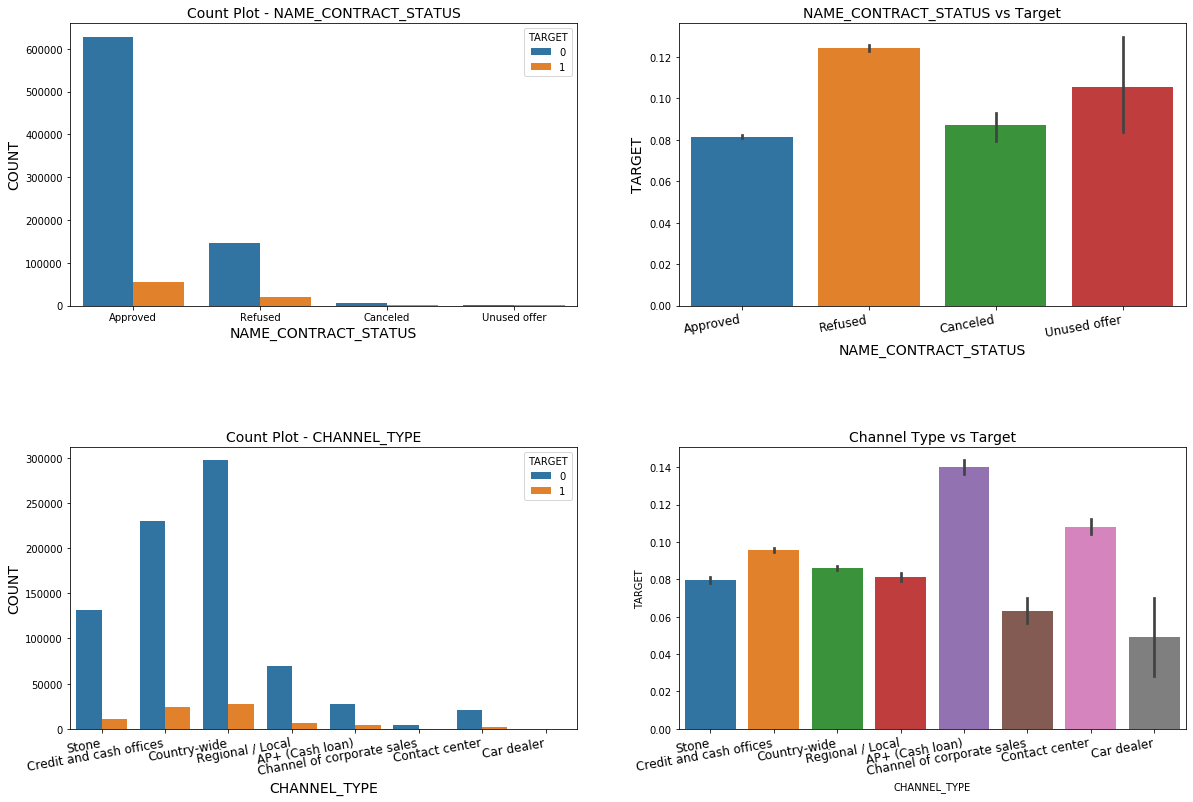

In [42]:
print("Univariate Analysis :\n")
# Contract Status vs Target 
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
plt.subplot(2, 2, 1)
plt.title('Count Plot - NAME_CONTRACT_STATUS', fontsize=14)
sns.countplot(x='NAME_CONTRACT_STATUS', hue= 'TARGET', data=df_merged)
plt.xlabel('NAME_CONTRACT_STATUS', fontsize=14)
plt.ylabel('COUNT', fontsize=14)

plt.subplot(2, 2, 2)
# plt.figure(figsize=(15, 9))
plt.title('NAME_CONTRACT_STATUS vs Target', fontsize=14)
sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET', data=df_merged)
plt.xlabel('NAME_CONTRACT_STATUS', fontsize=14)
plt.xticks(
    rotation=10, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.ylabel('TARGET', fontsize=14)

plt.subplot(2, 2, 3)
plt.title('Count Plot - CHANNEL_TYPE', fontsize=14)
sns.countplot(x='CHANNEL_TYPE', hue= 'TARGET', data=df_merged)
plt.xlabel('CHANNEL_TYPE', fontsize=14)
plt.xticks(
    rotation=10, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.ylabel('COUNT', fontsize=14)


plt.subplot(2, 2, 4)
plt.title('Channel Type vs Target', fontsize=14)
sns.barplot(x='CHANNEL_TYPE', y='TARGET', data=df_merged)
plt.xlabel('CHANNEL_TYPE')
plt.xticks(
    rotation=10, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.ylabel('TARGET')

plt.show()

- ### Bivariate Analysis

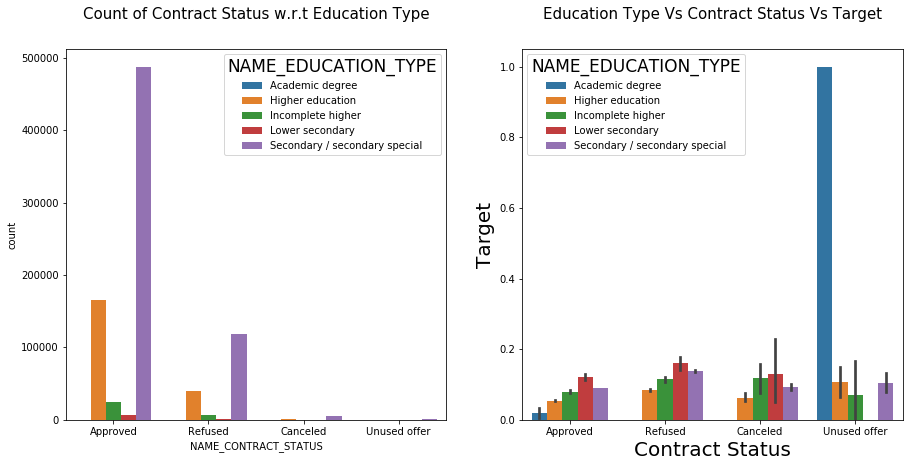

In [43]:
plt.figure(figsize=(15, 15))

#plotting count of contract status with education type
plt.subplot(2, 2, 1)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Count of Contract Status w.r.t Education Type',fontsize=15)
sns.countplot(data = df_merged, x= 'NAME_CONTRACT_STATUS', 
                   order=df_merged['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'NAME_EDUCATION_TYPE')

# Education Type vs Target vs Contract Status
plt.subplot(2, 2, 2)
plt.title('Education Type Vs Contract Status Vs Target',fontsize=15)
sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET', data=df_merged, hue='NAME_EDUCATION_TYPE')
plt.xlabel('Contract Status')
plt.ylabel('Target')
plt.show()

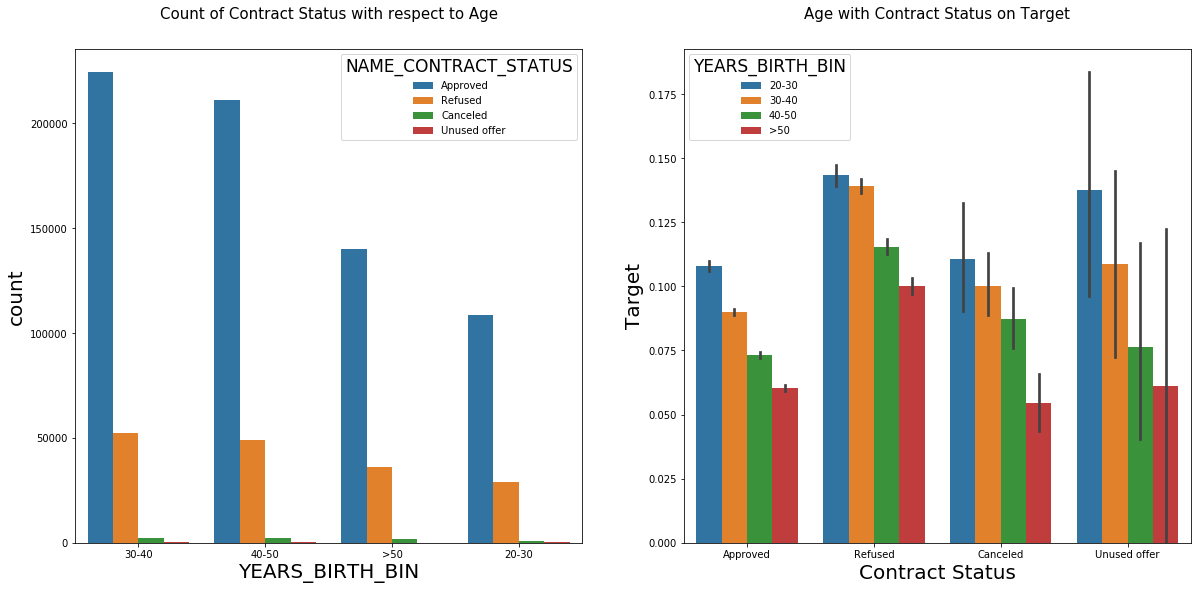

In [44]:
plt.figure(figsize=(20, 20))

#plotting count of contract status with Age
plt.subplot(2, 2, 1)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Count of Contract Status with respect to Age',fontsize=15)
sns.countplot(data = df_merged, x= 'YEARS_BIRTH_BIN', 
                   order=df_merged['YEARS_BIRTH_BIN'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

# Age vs Target vs Contract Status
plt.subplot(2, 2, 2)
plt.title('Age with Contract Status on Target',fontsize=15)
sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET', data=df_merged, hue='YEARS_BIRTH_BIN')
plt.xlabel('Contract Status')
plt.ylabel('Target')
plt.show()

## Step 5: Recommendations

#### Parameters affecting loan default:
- Gender: <p>Female Applicants must be given more importance as they have less default rate when compared to male</p><br>
- Income Type: <p>State servants and Others category can be given more importance</p><br>
- Education Type: <p>Importance to be given to applicants based on education level. Greater the education level lesser is the chance of getting default.</p><br>
- Region Rating: <p>Rating of the region where the client resides is a vital factor for default rate</p><br>
- Family Status: <p>More importance to Widow and Married</p><br>
- Income Amount: <p>As income increases default rate reduce</p><br>
- Housing Type: <p>Office Apartment should be most preferred</p><br>
- Experience: <p>Greater the experience lesser is the default rate</p><br>

#### Existing Client:
- Contract Status: <p>If applicant was approved for a previous application then the applicant can be given more preference when compared to other applicants.</p>